In [183]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
df = pd.read_excel("donnees_immobilieres_extended.xlsx")

In [185]:
df.head()

,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,1,139.87,3,1982,21.33,2,1,2023,1.1,47.5,11.9,1961.68
1,2,114.47,4,1991,2.90,5,1,2022,4.7,44.2,11.9,2303.67
2,3,145.91,2,2005,3.00,3,1,2017,3.2,53.8,10.7,2224.12
3,4,180.92,4,1995,29.61,3,1,2022,6.1,68.3,11.1,2425.63
4,5,110.63,3,2016,11.54,0,0,2021,9.0,81.9,10.8,2323.34


## 1 Statistiques Descriptives et Analyse Préliminaire

**1.1 Statistiques descriptives**

Calculez et présentez les statistiques descriptives pour chaque variable :  
- Moyenne ( ¯X ), médiane, écart-type (sX). 
- Minimum, maximum, quartiles. 
- Asymétrie (skewness) et aplatissement (kurtosis) pour le prix. 
- Présentez un tableau récapitulatif. 

In [186]:
#Statistiques Descriptives

def stat_descri(variable):
    statistiques =  {
        "moyenne" : variable.mean(),
        "mediane" : variable.median(),
        "ecart_type" : variable.std(),
        "minimum" : variable.min(),
        "Q1" : variable.quantile(0.25),
        "Q2 (mediane)" : variable.quantile(0.50),
        "Q3" : variable.quantile(0.75),
        "maximum" : variable.max(),
        "Asymetrie (skewness)" : skew(variable),
        "Applatissement (kurtosis)" : kurtosis(variable)
    }

    return pd.Series(statistiques)

for c in df.columns :
    stat_variable = stat_descri(df[c])
    print(f"\nStatistiques pour {c} :")
    print(stat_variable)


Statistiques pour ID :
moyenne                       75.500000
mediane                       75.500000
ecart_type                    43.445368
minimum                        1.000000
Q1                            38.250000
Q2 (mediane)                  75.500000
Q3                           112.750000
maximum                      150.000000
Asymetrie (skewness)           0.000000
Applatissement (kurtosis)     -1.200107
dtype: float64

Statistiques pour Surface_m2 :
moyenne                      116.706800
mediane                      117.845000
ecart_type                    37.693819
minimum                       15.210000
Q1                            93.240000
Q2 (mediane)                 117.845000
Q3                           139.637500
maximum                      218.530000
Asymetrie (skewness)           0.047238
Applatissement (kurtosis)     -0.142272
dtype: float64

Statistiques pour Chambres :
moyenne                      2.886667
mediane                      3.000000
ecart_ty

In [187]:
#Tableau Recapitulatif

df_tableau = df.apply(stat_descri)
df_tableau

,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
moyenne,75.500000,116.706800,2.886667,2001.826667,16.500267,2.580000,0.460000,2019.840000,5.468667,63.668000,8.064000,2107.904800
mediane,75.500000,117.845000,3.000000,2002.500000,16.865000,2.500000,0.000000,2020.000000,5.600000,63.450000,8.300000,2105.050000
ecart_type,43.445368,37.693819,1.077760,11.704841,9.017430,1.761901,0.500067,2.288225,1.868249,9.295458,3.746502,229.921013
minimum,1.000000,15.210000,1.000000,1980.000000,0.830000,0.000000,0.000000,2015.000000,1.000000,42.900000,1.000000,1500.770000
Q1,38.250000,93.240000,2.000000,1991.000000,9.105000,1.000000,0.000000,2018.000000,4.125000,57.500000,5.300000,1934.285000
Q2 (mediane),75.500000,117.845000,3.000000,2002.500000,16.865000,2.500000,0.000000,2020.000000,5.600000,63.450000,8.300000,2105.050000
Q3,112.750000,139.637500,4.000000,2012.000000,24.697500,4.000000,1.000000,2022.000000,7.000000,70.475000,10.875000,2272.780000
maximum,150.000000,218.530000,5.000000,2022.000000,29.990000,5.000000,1.000000,2023.000000,10.000000,83.900000,17.100000,2743.040000
Asymetrie (skewness),0.000000,0.047238,0.097162,-0.082087,-0.140519,-0.011187,0.160514,-0.318628,-0.143595,0.051393,-0.115250,0.154664
Applatissement (kurtosis),-1.200107,-0.142272,-0.707385,-1.166922,-1.192379,-1.331673,-1.974235,-1.012342,-0.519511,-0.600971,-0.648344,-0.492978


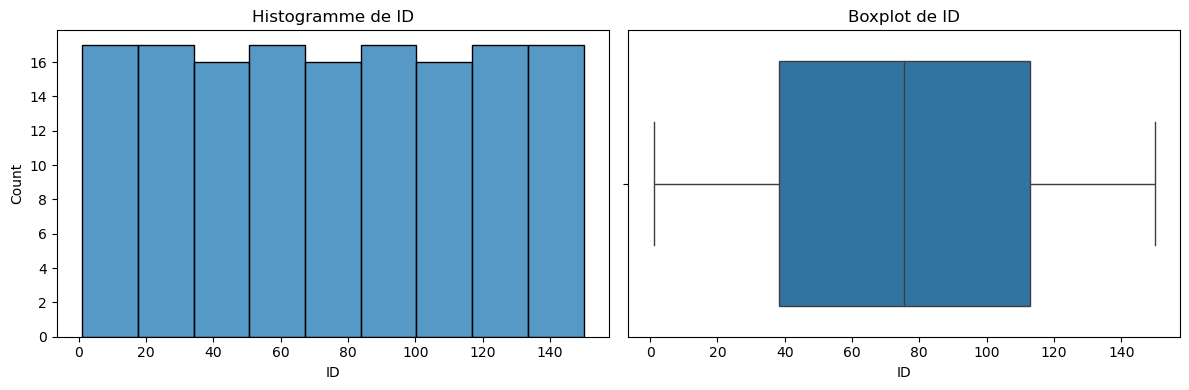

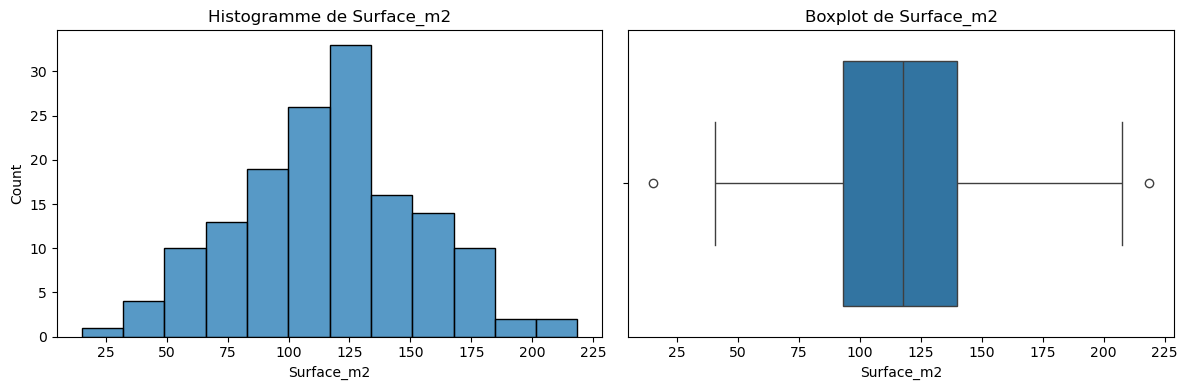

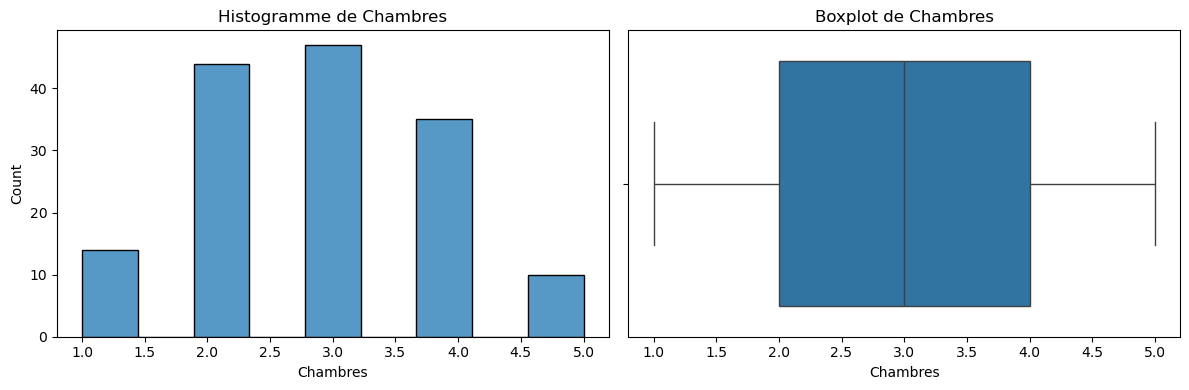

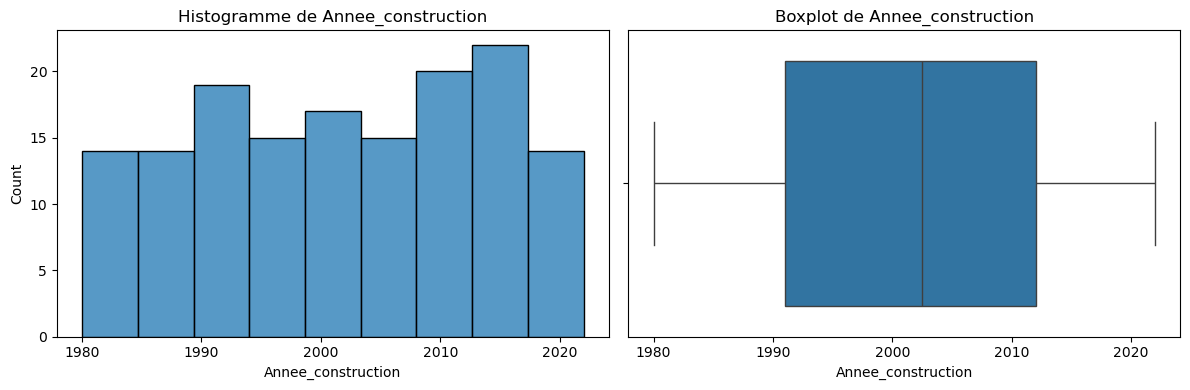

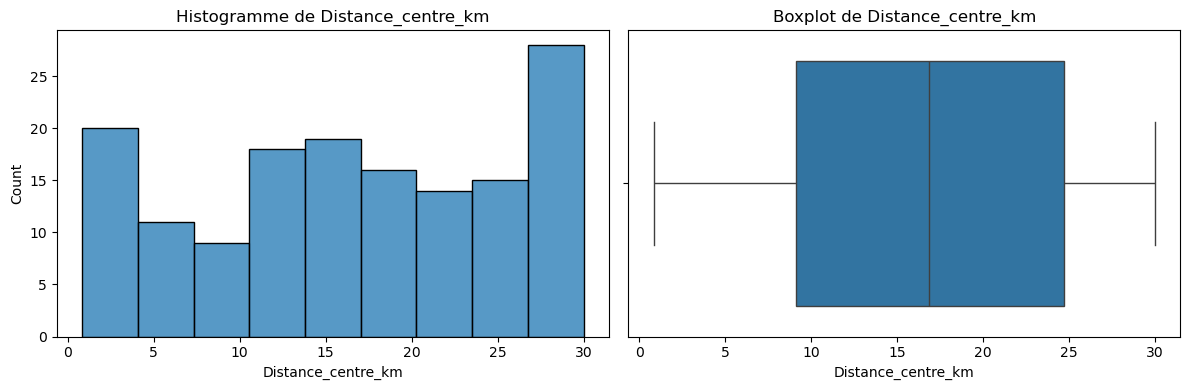

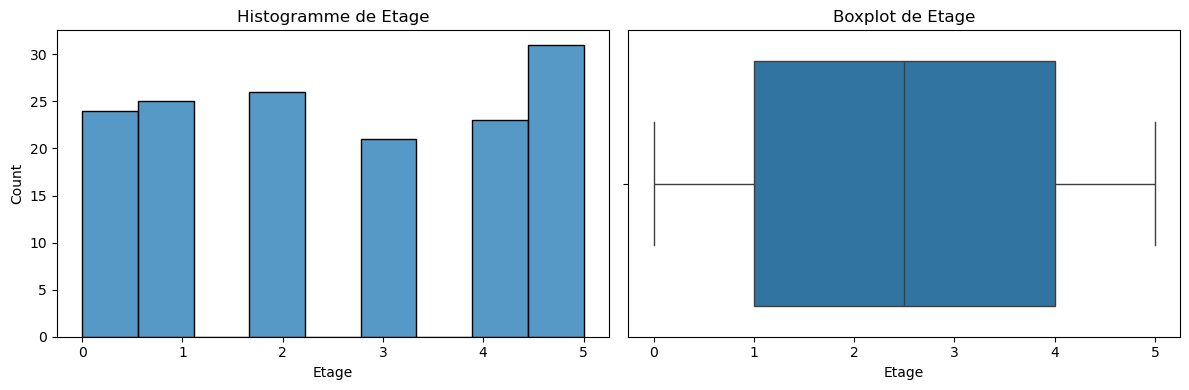

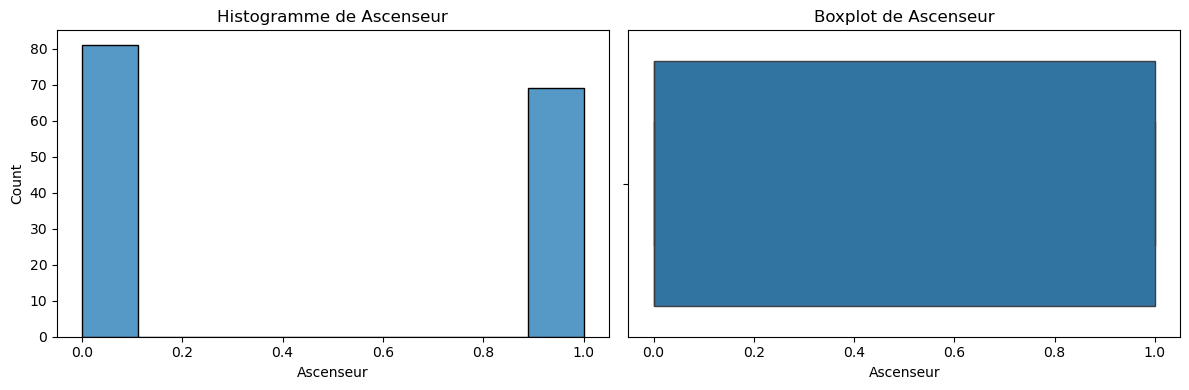

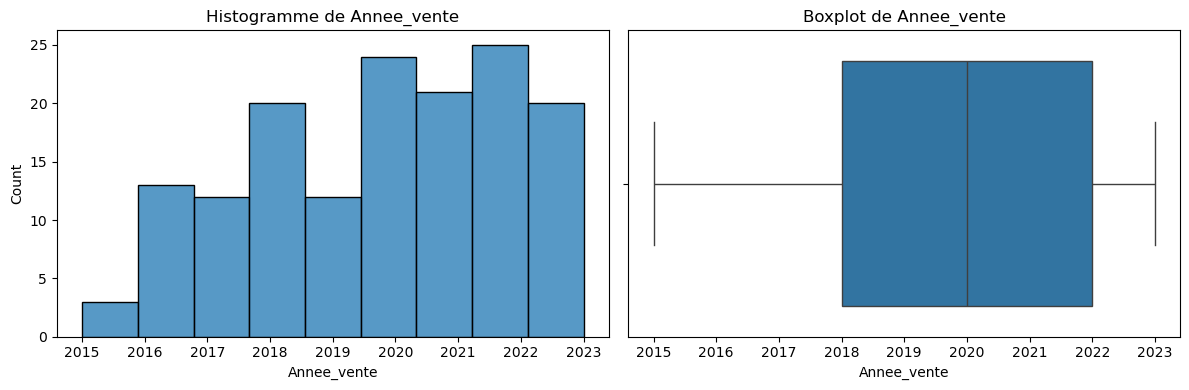

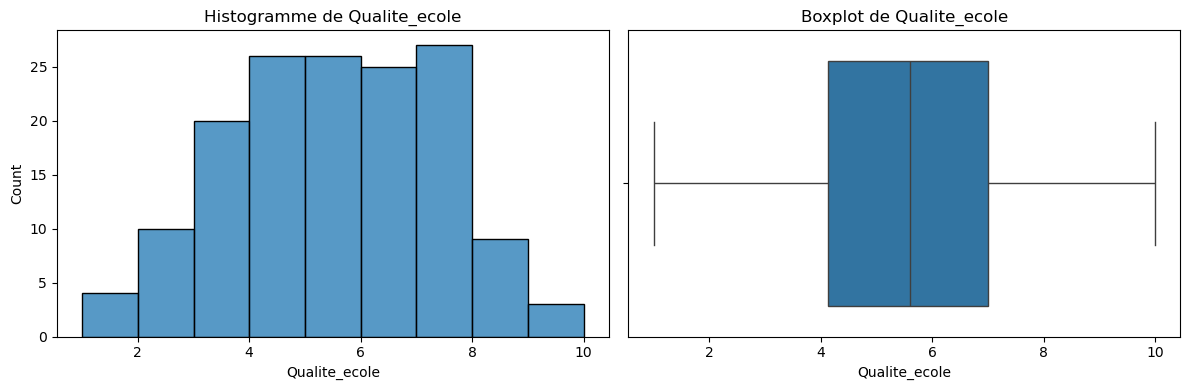

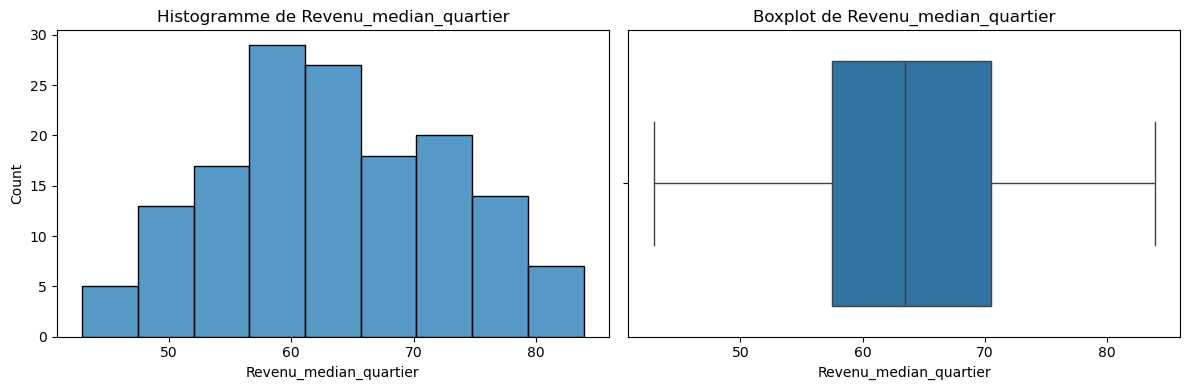

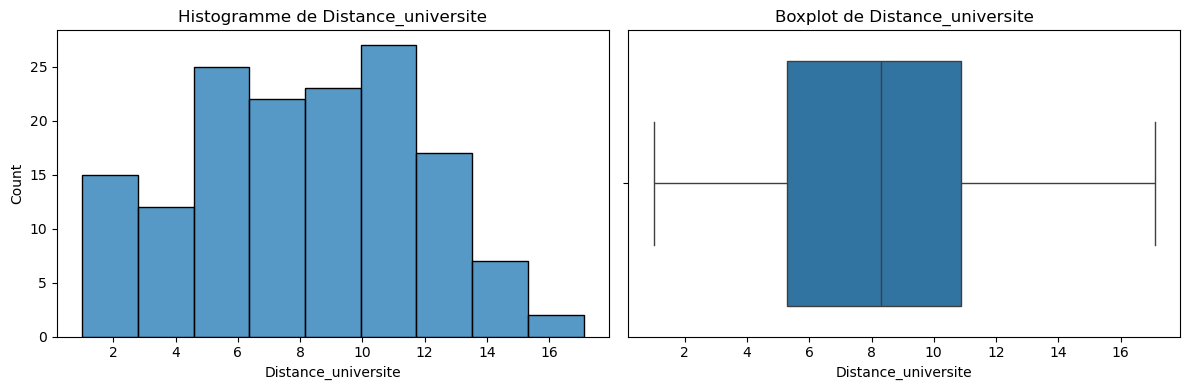

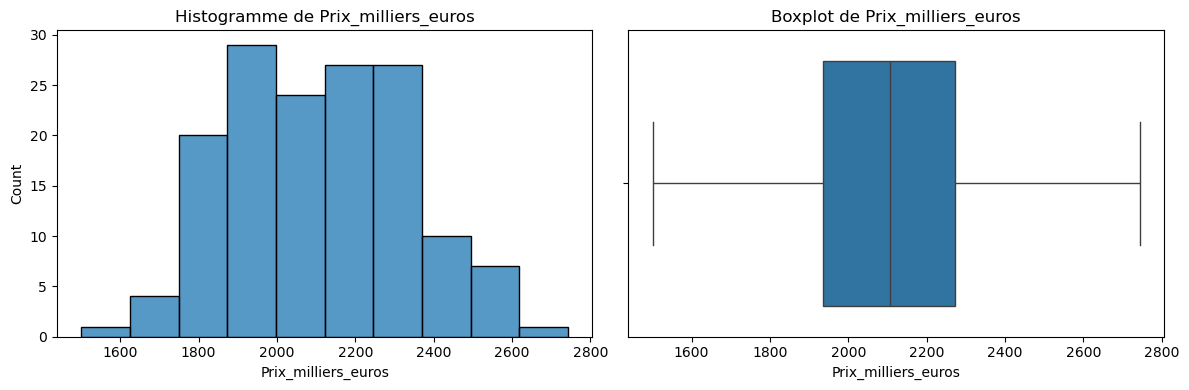

In [188]:
#Histogrammes & Boites a Moustaches

def graphiques_stat (variable) :

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=df, x=df[variable], ax = axes[0])
    axes[0].set_title(f"Histogramme de {variable}")
    axes[0].set_xlabel(f"{variable}")

    sns.boxplot(data=df,x=df[variable], ax = axes[1]) 
    axes[1].set_title(f"Boxplot de {variable}")
    axes[1].set_xlabel(f"{variable}")

    plt.tight_layout()
    plt.show()

for c in df.columns :
    graphiques_stat(c)



L’analyse des histogrammes et des boîtes à moustaches montre que la variable **Prix_milliers_euros présente une asymétrie positive marquée**, avec une distribution étirée vers les valeurs élevées. Une **transformation logarithmique** apparaît ainsi **pertinente** afin de réduire l’asymétrie et de stabiliser la variance.  

La variable **Surface_m2 présente également une légère asymétrie à droite** ; une **transformation logarithmique pourrait être envisagée**, bien que celle-ci soit moins nécessaire.

**1.2 Analyse de correlation**

- Calculez la matrice de corrélation entre toutes les variables continues
- Créez un graphique de corrélation (heatmap)
- Identifiez les paires de variables fortement corrélées entre elles (risque de multicolinéarité)

In [189]:
#Selection des variables continues

df_continue = df.select_dtypes(include = 'number')
df_continue = df_continue.drop(columns=["ID", "Chambres", "Annee_construction", "Etage", "Ascenseur", "Annee_vente"])
df_continue

,Surface_m2,Distance_centre_km,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,139.87,21.33,1.1,47.5,11.9,1961.68
1,114.47,2.90,4.7,44.2,11.9,2303.67
2,145.91,3.00,3.2,53.8,10.7,2224.12
3,180.92,29.61,6.1,68.3,11.1,2425.63
4,110.63,11.54,9.0,81.9,10.8,2323.34
...,...,...,...,...,...,...
145,151.27,10.20,4.6,51.3,6.7,2140.32
146,70.52,19.19,4.1,42.9,3.7,1680.16
147,67.18,7.58,5.4,71.6,8.7,1902.30
148,140.88,2.74,5.0,54.4,9.5,2252.99


In [190]:
#Création de la matrice de corrélation

corr_matrix =df_continue.corr()
corr_matrix

,Surface_m2,Distance_centre_km,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
Surface_m2,1.000000,-0.074765,0.043832,0.013908,-0.088362,0.826731
Distance_centre_km,-0.074765,1.000000,0.042029,0.111579,-0.055751,-0.306648
Qualite_ecole,0.043832,0.042029,1.000000,0.598651,-0.444083,0.253632
Revenu_median_quartier,0.013908,0.111579,0.598651,1.000000,-0.304002,0.205779
Distance_universite,-0.088362,-0.055751,-0.444083,-0.304002,1.000000,-0.124521
Prix_milliers_euros,0.826731,-0.306648,0.253632,0.205779,-0.124521,1.000000


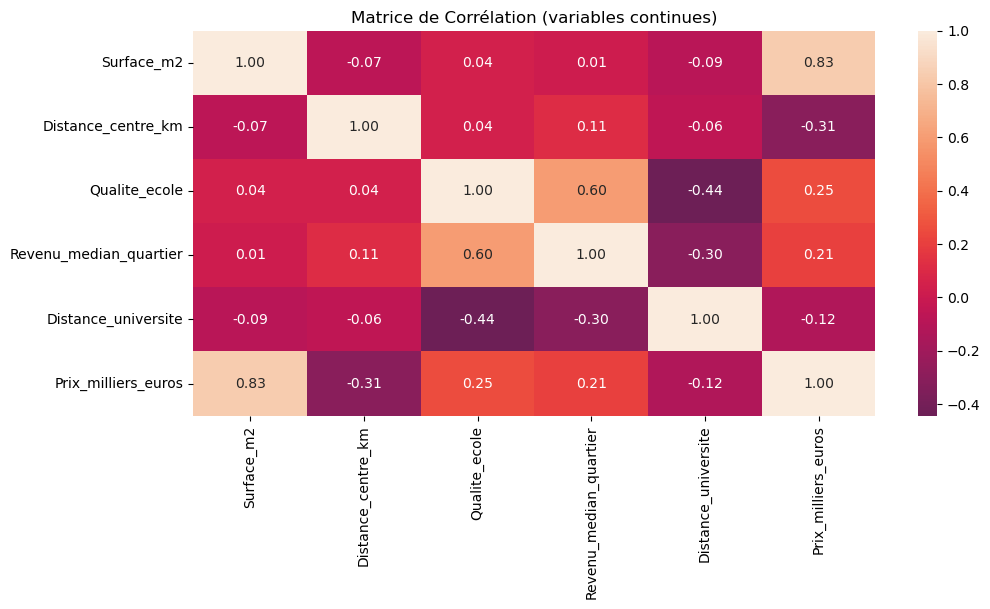

In [191]:
#Visualisation de la matrice de corrélation

plt.figure(figsize=(11,5))

sns.heatmap(data = corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="rocket",
            center=0
            )

plt.title("Matrice de Corrélation (variables continues)")
plt.show()

**Quelle variable semble avoir l’impact le plus fort sur le prix selon la corrélation ? Attention : corrélation ̸= causalité !**

L’analyse de la matrice de corrélation montre que la variable **la plus fortement corrélée au prix (Prix_milliers_euros) est la surface du logement (Surface_m2)**, avec un coefficient de corrélation de **0.83**, indiquant une **relation positive forte.**

On observe également une **corrélation modérée** entre la **qualité des écoles (Qualite_ecole)** et le **revenu médian du quartier (Revenu_median_quartier)** : **0.60**, ce qui pourrait suggérer un risque limité de multicolinéarité si ces variables sont intégrées simultanément dans un modèle de régression.

Il convient toutefois de rappeler que la corrélation observée ne permet pas d’établir une relation de causalité.

## 2 Le Modèle Linéaire : Estimation et Interprétation

**2.1 Modèle de régression linéaire simple**

Prix*i* ​= β0 ​+ β1 ​× Surface*i* ​+ u*i*​

Première étape : Régressez le prix sur la surface uniquement.  

On utilise les Moindres Carrés Ordinaires (MCO) pour estimer les coefficients β0 et β1.

In [192]:
import statsmodels.api as sm

In [193]:
#Regression du prix sur la surface

X = df['Surface_m2']
y = df['Prix_milliers_euros']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

#Éstimation des coéfficients (MCO)

#Éstimateurs β0 et β1
beta0 = model.params['const']
beta1 = model.params['Surface_m2']

#Écart-type de chaque coefficient (ˆσˆβj)
std_beta0 = model.bse['const']
std_beta1 = model.bse['Surface_m2']

#Statistique t et la p-valeur
t_beta0 = model.tvalues['const']
t_beta1 = model.tvalues['Surface_m2']
p_beta0 = model.pvalues['const']
p_beta1 = model.pvalues['Surface_m2']

#R2 et le R2 ajusté
r2 = model.rsquared
r2_adj = model.rsquared_adj

print(f"β0 = {beta0}, σβ0 = {std_beta0}, t = {t_beta0}, p = {p_beta0}")
print(f"β1 = {beta1}, σβ1 = {std_beta1}, t = {t_beta1}, p = {p_beta1}")
print(f"R² = {r2}, R² ajusté = {r2_adj}")


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.683
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     319.6
Date:                 Wed, 31 Dec 2025   Prob (F-statistic):           8.45e-39
Time:                         00:01:27   Log-Likelihood:                -941.72
No. Observations:                  150   AIC:                             1887.
Df Residuals:                      148   BIC:                             1893.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1519.3743     34.584     43.93

**Que signifie le coefficient ˆ β1 ? Si la surface augmente de 1 m², de combien le prix augmente-t-il en moyenne ?**

Le coefficient estimé pour la surface est : **β1 = 5.0428.**  
Cela signifie que pour chaque m² supplémentaire de surface, le **prix du bien augmente en moyenne de 5 042,8€**.

La p-valeur est très faible : **p<0,01** donc cela veut dire que le coefficient est **très significatif**

**R² = 0,683**, donc **68%** de la variation des prix est expliquée par la surface seule.



**2.2 Modèle de régression linéaire multiple**

In [194]:
#Création du modèle de régression linéaire multiple

X = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur']]
y = df['Prix_milliers_euros']

X = sm.add_constant(X)

model_multi = sm.OLS(y, X).fit()

print(model_multi.summary())

coefficients = model_multi.params
ecarts_types = model_multi.bse
t_values = model_multi.tvalues
p_values = model_multi.pvalues
r2 = model_multi.rsquared
r2_adj = model_multi.rsquared_adj

print("Coefficients :\n", coefficients)
print("\nÉcarts-types :\n", ecarts_types)
print("\nt-values :\n", t_values)
print("\nP-values :\n", p_values)
print(f"\nR² = {r2}, R² ajusté = {r2_adj}")

                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.789
Model:                             OLS   Adj. R-squared:                  0.780
Method:                  Least Squares   F-statistic:                     88.94
Date:                 Wed, 31 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                         00:01:27   Log-Likelihood:                -911.43
No. Observations:                  150   AIC:                             1837.
Df Residuals:                      143   BIC:                             1858.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1679.4

**1. Tous les coefficients sont-ils significatifs ?**

À l’exception de la constante, **tous les coefficients explicatifs sont statistiquement significatifs** au seuil de **5 %**, leurs p-values étant inférieures à 0,05. La constante n’est en revanche pas significative, ce qui n’est pas problématique en soi car elle n’a pas d’interprétation économique directe.

**2. Quel est l’impact marginal de chaque variable sur le prix ?**

- **Surface_m2** : chaque m² supplémentaire augmente le prix moyen de 4,39 milliers d’euros.

- **Chambres** : chaque chambre supplémentaire augmente le prix moyen de 33,92 milliers d’euros.

- **Annee_construction** : chaque année de construction plus récente augmente le prix de 1,61 milliers d’euros.

- **Distance_centre_km** : chaque km supplémentaire du centre-ville réduit le prix moyen de 6,14 milliers d’euros.

- **Etage** : chaque étage supplémentaire augmente le prix de 12,25 milliers d’euros.

- **Ascenseur** : un appartement avec ascenseur coûte en moyenne 55,51 milliers d’euros de plus qu’un appartement similaire sans ascenseur.

**3. Pour la variable Ascenseur : comment interpréter le coefficient ?**

Le coefficient associé à la variable Ascenseur indique que, toutes choses égales par ailleurs, un logement disposant d’un ascenseur est **en moyenne plus cher de 55,51 milliers d’euros** qu’un logement comparable sans ascenseur. Il s’agit de l’effet différentiel moyen lié à la présence d’un ascenseur. Le coefficient associé à la présence d’un ascenseur est positif et significatif, mais présente une **erreur standard relativement élevée**, suggérant une estimation moins précise, probablement liée à une forte **hétérogénéité** ou à des **corrélations avec d’autres caractéristiques** du logement.

**4. Comment interprétez-vous la différence entre R2 et R2 (adjusted)?**

Le **R² indique que 78,9 %** de la variance du prix est expliquée par les variables incluses dans le modèle.  

Le R² ajusté, légèrement inférieur **(0,780)**, tient compte du nombre de **variables explicatives et pénalise** l’ajout de variables peu informatives. La faible différence entre les deux suggère que l’ajout de variables améliore la qualité explicative du modèle sans entraîner de sur-ajustement excessif.



**2.3 Transformation logarithmique**

In [195]:
# Vérifier s'il y a des 0 ou des valeurs négatives
print((df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage']] <= 0).sum())

Surface_m2             0
Chambres               0
Annee_construction     0
Distance_centre_km     0
Etage                 24
dtype: int64


Avant d’appliquer une transformation logarithmique, nous avons **vérifié l’absence de valeurs nulles ou négatives**.  

La variable **Étage** présentant des valeurs **nulles** (rez-de-chaussée), nous avons appliqué un **décalage de +1** afin de permettre la transformation logarithmique (en particulier dans le cadre du **modèle log-log**, le logarithme n’étant pas défini en zéro). Cette transformation permet d’inclure l’ensemble des observations tout en conservant l’ordre des étages.

La variable **Ascenseur** étant une variable **binaire**, elle n’est pas concernée par la transformation logarithmique. Par conséquent, il n’est pas nécessaire de vérifier la présence de valeurs nulles ou négatives pour cette variable.

In [196]:
# Décaler la numérotation des étages pour le log (rdc devient etage 1)
df['Etage_decale'] = df['Etage'] + 1

In [197]:
#Modélisation en semi-log et en log-log.

# Modèle Linéaire multiple
X_lin = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur']]
X_lin = sm.add_constant(X_lin)
y = df['Prix_milliers_euros']

model_lin = sm.OLS(y, X_lin).fit()
print("=== Modèle linéaire multiple ===")
print(model_lin.summary())

# Modèle Semi-log : log du prix uniquement 
# ln(Prix_i) = β0 + β1 × Surface_m2_i + β2 × Chambres_i + β3 × Annee_construction_i + β4 × Distance_centre_km_i + β5 × Etage_i + β6 × Ascenseur_i + u_i

y_log = np.log(df['Prix_milliers_euros'])
X_semi_log = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur']]
X_semi_log = sm.add_constant(X_semi_log)

model_semi_log = sm.OLS(y_log, X_semi_log).fit()
print("\n=== Modèle semi-log ===")
print(model_semi_log.summary())

# Modèle Log-log : log du prix et des variables continues
# log(Prix) = log(Surface) + log(Distance) + log(Etage+1) + Chambres + Année + Ascenseur

X_log = pd.DataFrame({
    'log_Surface': np.log(df['Surface_m2']),
    'Chambres': df['Chambres'],
    'Annee_construction': df['Annee_construction'],
    'log_Distance': np.log(df['Distance_centre_km']),
    'log_Etage': np.log(df['Etage_decale']),
    'Ascenseur': df['Ascenseur']
})

X_log = sm.add_constant(X_log)

model_log_log = sm.OLS(y_log, X_log).fit()
print("\n=== Modèle log-log ===")
print(model_log_log.summary())

=== Modèle linéaire multiple ===
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.789
Model:                             OLS   Adj. R-squared:                  0.780
Method:                  Least Squares   F-statistic:                     88.94
Date:                 Wed, 31 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                         00:01:27   Log-Likelihood:                -911.43
No. Observations:                  150   AIC:                             1837.
Df Residuals:                      143   BIC:                             1858.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [198]:
#Comparaison des 3 modèles

print("=== Linéaire multiple ===")
print(pd.concat([model_lin.params, model_lin.pvalues], axis=1).rename(columns={0:'Coef', 1:'p-valeur'}).to_string())
print("R² Linéaire multiple :", model_lin.rsquared)
print("R² ajusté :", model_lin.rsquared_adj)
print("AIC :", model_lin.aic)
print("BIC :", model_lin.bic)

print("\n=== Semi-log ===")
print(pd.concat([model_semi_log.params, model_semi_log.pvalues], axis=1).rename(columns={0:'Coef', 1:'p-valeur'}).to_string())
print("R² Semi-log :", model_semi_log.rsquared)
print("R² ajusté :", model_semi_log.rsquared_adj)
print("AIC :", model_semi_log.aic)
print("BIC :", model_semi_log.bic)

print("\n=== Log-log ===")
print(pd.concat([model_log_log.params, model_log_log.pvalues], axis=1).rename(columns={0:'Coef', 1:'p-valeur'}).to_string())
print("R² Log-log :", model_log_log.rsquared)
print("R² ajusté :", model_log_log.rsquared_adj)
print("AIC :", model_log_log.aic)
print("BIC :", model_log_log.bic)

=== Linéaire multiple ===
                           Coef      p-valeur
const              -1679.490797  2.759468e-01
Surface_m2             4.387871  3.673031e-31
Chambres              33.920464  1.155769e-03
Annee_construction     1.609340  3.721665e-02
Distance_centre_km    -6.144640  5.902425e-09
Etage                 12.254026  1.646575e-02
Ascenseur             55.514127  2.346952e-03
R² Linéaire multiple : 0.7886569640697605
R² ajusté : 0.7797894241006595
AIC : 1836.858055215955
BIC : 1857.9325022746286

=== Semi-log ===
                        Coef      p-valeur
const               5.841285  2.995923e-13
Surface_m2          0.002110  8.325644e-32
Chambres            0.015249  1.967168e-03
Annee_construction  0.000769  3.523225e-02
Distance_centre_km -0.003010  1.906683e-09
Etage               0.005327  2.720493e-02
Ascenseur           0.026498  2.136476e-03
R² Semi-log : 0.7916490027528883
R² ajusté : 0.7829070028683941
AIC : -460.1942785352435
BIC : -439.1198314765697

=== Log

**1. Comparez les trois modèles.**

**R² et R² ajusté :**
- Semi-log > Linéaire multiple > Log-log
- Le semi-log explique légèrement mieux la variabilité du prix (0.783 vs 0.780).

**Significativité des variables :**
- **Linéaire multiple** et **semi-log** : toutes les variables explicatives significatives.
- **Log-log** : Année de construction n’est plus significative → moins adapté.

**Interprétation des coefficients :**
- **Linéaire** : l’effet absolu d’une unité (ex : 1 m² de surface → +4.39 k€).
- **Semi-log** : effet relatif sur le prix (ex : 1 m² → +0.21 % du prix moyen).
- **Log-log** : élasticité, utile si on veut comparer des effets proportionnels mais moins adapté ici car certaines variables sont petites ou nulles (Etage RDC, Chambres).

**2. Quel modèle semble le plus approprié et pourquoi ?**. 

Le **modèle semi-log** apparaît comme le plus approprié. Il présente le **R² ajusté le plus élevé** et l’ensemble des variables explicatives y sont **statistiquement significatives**. La comparaison des critères d’information **AIC** et **BIC**, effectuée entre les modèles estimés sur le logarithme du prix, montre que le modèle semi-log présente des **valeurs plus faibles** que le modèle log-log. Cela indique que le modèle semi-log offre le **meilleur compromis entre qualité d’ajustement et complexité**, confirmant ainsi son choix comme spécification privilégiée. Enfin, le modèle semi-log permet une interprétation économique pertinente en termes de **variations relatives du prix**.

In [199]:
#Nous sauvegardons notre modèle sélectionné dans la variable best_model pour faciliter les utilisations futures

best_model = model_semi_log

## 3 Diagnostics du Modèle

**3.1 Multicolinéarité**

**Calculez les VIF (Variance Inflation Factor) pour chaque variable**

In [200]:
X = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur']].copy()
X = X.dropna()
X =  sm.add_constant(X)

X.head()

,const,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur
0,1.0,139.87,3,1982,21.33,2,1
1,1.0,114.47,4,1991,2.90,5,1
2,1.0,145.91,2,2005,3.00,3,1
3,1.0,180.92,4,1995,29.61,3,1
4,1.0,110.63,3,2016,11.54,0,0


In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [202]:
#Calcul des VIF

vif = pd.DataFrame({
    "Variable" : X.columns,
    "VIF" : [variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]
})

vif

,Variable,VIF
0,const,30387.380900
1,Surface_m2,1.555201
2,Chambres,1.555268
3,Annee_construction,1.026917
4,Distance_centre_km,1.024389
5,Etage,1.012863
6,Ascenseur,1.027848


**Y a-t-il des variables avec un VIF élevé ?**

**Non**, il n'y a pas de variable avec un VIF élevé. À l’exception de la **constante**, dont le VIF **n’est pas interprété**, toutes les variables **explicatives** présentent des VIF proches de 1, indiquant une multicolinéarité très faible.

**Faut-il en supprimer certaines ?**

Non. Étant donné l’absence de multicolinéarité, **il n’est pas nécessaire de supprimer des variables explicatives**. Les coefficients sont estimés avec une variance faible et une bonne précision.

**Definir le biais de variable omise.**

Le biais de variable omise apparaît lorsqu’une **variable pertinente pour expliquer la variable dépendante est exclue du modèle alors qu’elle est corrélée avec une variable incluse**. Dans ce cas, les coefficients estimés sont **biaisés** et ne reflètent plus l’effet causal réel.

Supprimer une variable uniquement pour réduire la multicolinéarité peut donc détériorer la validité économique du modèle.

Le biais existe si et seulement si :

- la variable omise affecte Y
- elle est corrélée avec une variable explicative incluse

Si une des deux conditions manque, il n'y a pas de biais.

# 4 Tests et Inférence

In [203]:
#Affichage des paramètres Distance_centre_km

m = best_model

beta_distance = m.params["Distance_centre_km"]
t_distance = m.tvalues["Distance_centre_km"]

beta_distance, t_distance


(-0.003010124317302314, -6.417324290587478)

In [204]:
p_two_sided = m.pvalues["Distance_centre_km"]

p_two_sided

1.9066826870349315e-09

Hypothèses :

 - H0 : 𝛽distance ≥ 0 (pas d’effet négatif)
 - H1 : 𝛽distance < 0 (effet négatif)

Dans statsmodels, la p-value affichée dans le summary est bilatérale.
Pour une hypothèse unilatérale à gauche, on convertit :

 - Si le t-stat est négatif (et donc le coef est négatif) : p(one-sided) ​= p(two-sided)​ / 2
 - Si le t-stat est positif : p(one-sided) ​= 1 − p(two-sided​) / 2


In [205]:
coef = m.params["Distance_centre_km"]
t_stat = m.tvalues["Distance_centre_km"]
p_two = m.pvalues["Distance_centre_km"]

# p-value unilatérale à gauche (H1 : beta < 0)
p_one = (p_two / 2) if (t_stat < 0) else (1 - p_two / 2)

print("=== Test sur Distance_centre_km (modèle semi-log) ===")
print("Coef beta =", coef)
print("t_stat    =", t_stat)
print("p-value (two-sided) =", p_two)
print("p-value (one-sided, H1: beta < 0) =", p_one)

# Interprétation en %
print("\nInterprétation :")
print(f"Approx : +1 km = {100*coef:.2f}% de variation du prix (approx).")
print(f"Exact  : +1 km = {(np.exp(coef)-1)*100:.2f}% de variation du prix (exact).")

=== Test sur Distance_centre_km (modèle semi-log) ===
Coef beta = -0.003010124317302314
t_stat    = -6.417324290587478
p-value (two-sided) = 1.9066826870349315e-09
p-value (one-sided, H1: beta < 0) = 9.533413435174657e-10

Interprétation :
Approx : +1 km = -0.30% de variation du prix (approx).
Exact  : +1 km = -0.30% de variation du prix (exact).


**1. Testez l’hypothèse que la distance au centre a un effet négatif sur le prix. Quelle est la p-value ?**

Si p-value < 0.05, on rejette H₀.  
Ici, p = 9.5e-10 => < 0.05

Donc, on rejette H₀.

Le coefficient associé à la distance au centre est **négatif** et hautement significatif dans le modèle semi-log.  

Le test unilatéral (H1 : β < 0) conduit à une p-**value de l’ordre de 9.5e-10**, largement inférieure au seuil de 5 %. On rejette donc l’hypothèse nulle.  

Une **augmentation d’un kilomètre** de la distance au centre entraîne une **baisse du prix du logement d’environ 0,30 %**, toutes choses égales par ailleurs. L’approximation et l’effet exact sont quasiment identiques en raison de la faible valeur du coefficient.

**2. Testez l’hypothèse que tous les coefficients (sauf constante) soient nuls. Testez si l’ajout des variables : Qualite_ecole et Revenu_median_quartier améliore significativement le modèle**

In [206]:

from statsmodels.stats.anova import anova_lm

# Modèle sans les nouvelles variables (Qualite_ecole et Revenu_median_quartier)

y_log = np.log(df["Prix_milliers_euros"])

X_without = df[['Surface_m2', 'Chambres', 'Annee_construction',
                'Distance_centre_km', 'Etage', 'Ascenseur']]
X_without = sm.add_constant(X_without)
model_without = sm.OLS(y_log, X_without).fit()

# Modèle avec les nouvelles variables
X_with = df[['Surface_m2', 'Chambres', 'Annee_construction',
             'Distance_centre_km', 'Etage', 'Ascenseur',
             'Qualite_ecole', 'Revenu_median_quartier']]
X_with = sm.add_constant(X_with)
model_with = sm.OLS(y_log, X_with).fit()

# Test F pour comparer les modèles
anova_results = anova_lm(model_without, model_with)
print("Test F pour l'ajout de Qualite_ecole et Revenu_median_quartier :")
print(anova_results)

# Test F global pour le modèle de base
print("\nTest F global (modèle semi-log sans nouvelles variables) :")
print("F-statistic :", model_without.fvalue)
print("F p-value   :", model_without.f_pvalue)


Test F pour l'ajout de Qualite_ecole et Revenu_median_quartier :
   df_resid       ssr  df_diff   ss_diff          F        Pr(>F)
0     143.0  0.372121      0.0       NaN        NaN           NaN
1     141.0  0.262862      2.0  0.109259  29.303353  2.278248e-11

Test F global (modèle semi-log sans nouvelles variables) :
F-statistic : 90.55696788066157
F p-value   : 3.3090081481324995e-46


**Résultats du test F global :**

Le test F global pour l’hypothèse nulle que tous les coefficients (sauf la constante) sont nuls donne une statistique F de 90.56 avec une p-value extrêmement faible (3.309e-46). **On rejette donc H₀** : au moins un coefficient explicatif a un effet significatif sur le prix du logement.

**Test d’amélioration du modèle avec Qualite_ecole et Revenu_median_quartier :**

Le test F pour comparer le modèle de base (sans Qualite_ecole et Revenu_median_quartier) au modèle étendu (avec ces variables) donne une statistique F de 29.30 avec une p-value de 2.278e-11. On rejette donc l’hypothèse nulle selon laquelle l’ajout de ces variables n’améliore pas le modèle. Les variables Qualite_ecole et Revenu_median_quartier contribuent donc de manière significative à expliquer la variance du prix.

In [207]:
# Sélection du modèle retenu après les tests F
best_model = model_with

Au vu du **test F**, nous retenons le **modèle semi-log enrichi** incluant les variables Qualite_ecole et Revenu_median_quartier pour la suite de l’analyse.

**3. Pourquoi ne peut-on pas simplement utiliser plusieurs tests T pour tester plusieurs restrictions simultanément ?**

On ne peut pas utiliser plusieurs tests t pour tester plusieurs restrictions simultanément car chaque test t est un **test individuel** et ne contrôle pas le **risque global d’erreur de type I**.  

De plus, les coefficients étant **estimés conjointement**, ils peuvent être **corrélés entre eux**. Le test F permet de tester simultanément plusieurs restrictions en tenant compte de ces corrélations et du nombre de restrictions, ce qui en fait l’outil approprié.

**4.1 Stabilité structurelle**

**Testez si le COVID a un effet sur le marché immobilier en utilisant la méthode de votre choix.**

In [208]:
# Examin des statistiques des années de vente

print("Statistiques des années de vente :")
print(df['Annee_vente'].describe())

Statistiques des années de vente :
count     150.000000
mean     2019.840000
std         2.288225
min      2015.000000
25%      2018.000000
50%      2020.000000
75%      2022.000000
max      2023.000000
Name: Annee_vente, dtype: float64


In [209]:
#Définition d'un point de rupture et diviser les données en périodes pré et post-COVID

break_year = 2020

df_pre = df[df['Annee_vente'] < break_year]
df_post = df[df['Annee_vente'] >= break_year]

print(f"\nObservations avant {break_year} : {len(df_pre)}")
print(f"Observations après {break_year} : {len(df_post)}")


Observations avant 2020 : 60
Observations après 2020 : 90


In [210]:
#Estimation des modèles de régression semi-log pour chaque période (pré et post-COVID)

#Pré-COVID
y_log_pre = np.log(df_pre['Prix_milliers_euros'])
X_pre = df_pre[['Surface_m2', 'Chambres', 'Annee_construction',
                'Distance_centre_km', 'Etage', 'Ascenseur',
                'Qualite_ecole', 'Revenu_median_quartier']]
X_pre = sm.add_constant(X_pre)
model_pre = sm.OLS(y_log_pre, X_pre).fit()

#Post-COVID
y_log_post = np.log(df_post['Prix_milliers_euros'])
X_post = df_post[['Surface_m2', 'Chambres', 'Annee_construction',
                 'Distance_centre_km', 'Etage', 'Ascenseur',
                 'Qualite_ecole', 'Revenu_median_quartier']]
X_post = sm.add_constant(X_post)
model_post = sm.OLS(y_log_post, X_post).fit()

In [211]:
#Estimation du modèle de régression semi-log sur l'ensemble des données

y_log_full = np.log(df['Prix_milliers_euros'])
X_full = df[['Surface_m2', 'Chambres', 'Annee_construction',
             'Distance_centre_km', 'Etage', 'Ascenseur',
             'Qualite_ecole', 'Revenu_median_quartier']]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y_log_full, X_full).fit()

Pour cet exercice nous avonc décidés d'utiliser la **méthode Chow**. 

Le test de Chow permet de tester **l’existence d’une rupture structurelle** à une date donnée. Autrement dit, il permet de répondre à la question :

**"Est-ce que la relation entre la variable expliquée et ses déterminants est la même avant et après un événement donné ?"**

En comparant les coefficients estimés **avant** et **après** 2020, il permet d’évaluer si le COVID-19 a modifié la relation entre le prix des logements et leurs caractéristiques.

In [212]:
#Méthode choisie : Chow. - Détection de la rupture structurelle

k = X_full.shape[1]

n1 = len(df_pre)
n2 = len(df_post)

SSE_full = model_full.ssr
SSE1 = model_pre.ssr
SSE2 = model_post.ssr

F_chow = ((SSE_full - (SSE1 + SSE2)) / k) / ((SSE1 + SSE2) / (n1 + n2 - 2 * k))

from scipy.stats import f
p_chow = 1 - f.cdf(F_chow, k, n1 + n2 - 2 * k)

In [213]:
# Interprétation des résultats du test de Chow

print(f"\nChow F-statistic : {F_chow:.4f}")
print(f"Chow p-value : {p_chow:.4e}")

if p_chow < 0.05:
    print("Rejet de H₀ : il y a une rupture structurelle significative associée à la période COVID-19.")
else:
    print("Pas de rejet de H₀ : pas de rupture structurelle significative.")


Chow F-statistic : 8.7169
Chow p-value : 3.3287e-10
Rejet de H₀ : il y a une rupture structurelle significative associée à la période COVID-19.


**Si vous trouvez une rupture structurelle, discutez des implications pour votre analyse.**

Puisqu'il y a une **rupture structurelle significative** (p-value < 0.05), les relations entre les variables explicatives et le prix ont changé entre les périodes pré et post-COVID. Cela signifie que **le modèle estimé sur l'ensemble des données ne capture pas correctement les dynamiques** spécifiques à chaque période.

**Faut-il estimer des modèles séparés ?**

**Oui**, il est recommandé d'estimer des modèles séparés pour les périodes pré-COVID (avant 2020) et post-COVID (2020 et après).  

Cela permet :  
- D'**analyser les effets différentiels du COVID** sur les déterminants du prix immobilier.
- D'**éviter les biais** dus à la non-stationnarité des paramètres.
- De fournir des **prédictions plus précises** pour chaque période.

Par exemple, on pourrait comparer les coefficients pour voir si l'impact de la distance au centre ou de la surface a évolué après la pandémie.

## 5 Hétéroscédasticité et Autocorrélation

**1. Observez graphiquement si les résidus suivent un pattern.**

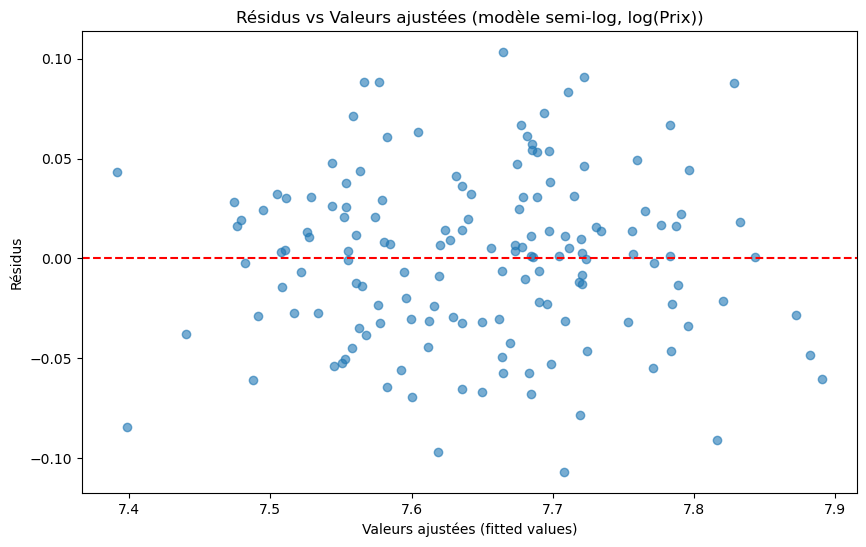

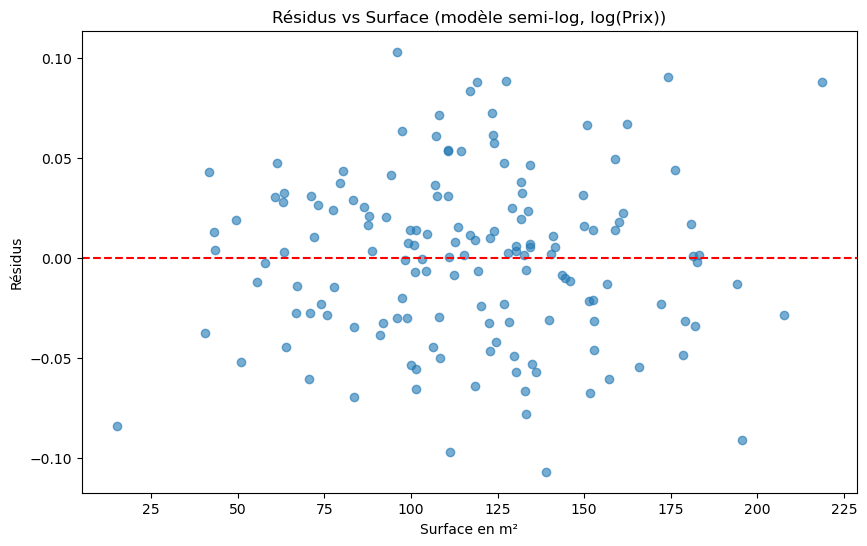

['const', 'Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur', 'Qualite_ecole', 'Revenu_median_quartier']


In [214]:
# Graphique des résidus vs valeurs ajustées pour détecter un pattern (hétéroscédasticité)
plt.figure(figsize=(10, 6))
plt.scatter(best_model.fittedvalues, best_model.resid, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs ajustées (fitted values)')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs ajustées (modèle semi-log, log(Prix))')
plt.show()

# Graphique des résidus vs une variable explicative (ex: Surface_m2)
plt.figure(figsize=(10, 6))
plt.scatter(df['Surface_m2'], best_model.resid, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Surface en m²')
plt.ylabel('Résidus')
plt.title('Résidus vs Surface (modèle semi-log, log(Prix))')
plt.show()

print(best_model.model.exog_names)

L’observation graphique des résidus en fonction des valeurs ajustées et de la surface **ne révèle pas de pattern systématique**. Les résidus sont centrés autour de **zéro** et leur variance semble globalement **constante**. Il n’y a pas de signe évident d’hétéroscédasticité.

**2. Testez l’hétéroscédasticité et corrigez-la.**

In [215]:
# Test de Breusch-Pagan pour l'hétéroscédasticité

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(best_model.resid, best_model.model.exog)

print("Test de Breusch-Pagan :")
print(f"LM Statistic: {bp_test[0]:.4f}")
print(f"LM p-value: {bp_test[1]:.4e}")
print(f"F Statistic: {bp_test[2]:.4f}")
print(f"F p-value: {bp_test[3]:.4e}")

if bp_test[1] < 0.05:
    print("Rejet de H₀ : présence d'hétéroscédasticité.")
else:
    print("Pas de rejet de H₀ : pas d'hétéroscédasticité significative.")

# Correction : écarts-types robustes (HC3)

model_robust = best_model.get_robustcov_results(cov_type='HC3')

print("\nCoefficients avec écarts-types robustes :")
print(model_robust.summary().tables[1])

# Correction : WLS (poids inversement proportionnels aux valeurs ajustées)

y_used = best_model.model.endog
X_used = best_model.model.exog

weights = 1 / (best_model.fittedvalues ** 2)

model_wls = sm.WLS(y_used, X_used, weights=weights).fit()

print("\nModèle WLS (basé sur le modèle enrichi) :")
print(model_wls.summary().tables[1])

Test de Breusch-Pagan :
LM Statistic: 5.4755
LM p-value: 7.0575e-01
F Statistic: 0.6677
F p-value: 7.1918e-01
Pas de rejet de H₀ : pas d'hétéroscédasticité significative.

Coefficients avec écarts-types robustes :
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.8302      0.664      8.782      0.000       4.518       7.143
Surface_m2                 0.0021      0.000     16.097      0.000       0.002       0.002
Chambres                   0.0161      0.004      3.823      0.000       0.008       0.024
Annee_construction         0.0007      0.000      2.139      0.034    5.39e-05       0.001
Distance_centre_km        -0.0032      0.000     -7.440      0.000      -0.004      -0.002
Etage                      0.0053      0.002      2.418      0.017       0.001       0.010
Ascenseur                  0.0224      0.007      3.025   

Hypothèses

H₀ : variance constante → pas d’hétéroscédasticité  
H₁ : variance non constante → hétéroscédasticité  

si p-value < 0.05 → on rejette H₀  
si p-value ≥ 0.05 → on ne rejette pas H₀  

Le test de Breusch–Pagan **ne permet pas de rejeter l’hypothèse nulle d’homoscédasticité** (p-value > 0.05). Il n’y a donc pas de preuve d’hétéroscédasticité significative dans le modèle.

Des **écarts-types robustes** ont néanmoins été calculés à titre de vérification. Les résultats et conclusions du modèle semi-log peuvent ainsi être interprétés de manière fiable.  

Les conclusions issues du modèle semi-log apparaissent robustes aux différentes méthodes d’estimation.

**3. Comparez les MCO standard, les MCO avec écarts-types robustes, et WLS.**

In [216]:
# Comparaison des coefficients et écarts-types pour les trois méthodes

import pandas as pd
from statsmodels.stats.stattools import durbin_watson

# --- Conversion propre des paramètres WLS en Series avec index ---

wls_params = pd.Series(
    model_wls.params,
    index=best_model.params.index
)

wls_bse = pd.Series(
    model_wls.bse,
    index=best_model.params.index
)

# --- Tableau comparatif ---

comparison = pd.DataFrame({
    "Variable": best_model.params.index,
    "OLS_coef": best_model.params,
    "OLS_se": best_model.bse,
    "Robust_coef": best_model.params,          # identiques aux OLS
    "Robust_se": model_robust.bse,
    "WLS_coef": wls_params,
    "WLS_se": wls_bse,
})

print("Comparaison des estimations :")
print(comparison.to_string(index=False))

# --- R² des modèles ---

print(f"\nR² MCO Standard : {best_model.rsquared:.4f}")
print(f"R² MCO Robust   : {best_model.rsquared:.4f}")
print(f"R² WLS          : {model_wls.rsquared:.4f}")

# --- Test d'autocorrélation (Durbin–Watson) ---

dw_stat = durbin_watson(best_model.resid)
print(f"\nStatistique de Durbin-Watson (MCO Standard) : {dw_stat:.4f}")

if dw_stat < 1.5:
    print("Indication d'autocorrélation positive.")
elif dw_stat > 2.5:
    print("Indication d'autocorrélation négative.")
else:
    print("Pas d'autocorrélation significative.")


Comparaison des estimations :
              Variable  OLS_coef   OLS_se  Robust_coef  Robust_se  WLS_coef   WLS_se
                 const  5.830250 0.614804     5.830250   0.663860  5.844286 0.614141
            Surface_m2  0.002061 0.000117     0.002061   0.000128  0.002064 0.000117
              Chambres  0.016134 0.004101     0.016134   0.004220  0.016158 0.004099
    Annee_construction  0.000710 0.000307     0.000710   0.000332  0.000704 0.000306
    Distance_centre_km -0.003239 0.000400    -0.003239   0.000435 -0.003255 0.000400
                 Etage  0.005330 0.002027     0.005330   0.002204  0.005258 0.002024
             Ascenseur  0.022356 0.007196     0.022356   0.007391  0.022300 0.007194
         Qualite_ecole  0.009655 0.002379     0.009655   0.002420  0.009662 0.002377
Revenu_median_quartier  0.001327 0.000481     0.001327   0.000495  0.001324 0.000481

R² MCO Standard : 0.8528
R² MCO Robust   : 0.8528
R² WLS          : 0.8534

Statistique de Durbin-Watson (MCO Standard)

**Interprétation :**

Les coefficients estimés sont très **similaires** entre le MCO standard, le MCO avec écarts-types robustes et le modèle WLS, indiquant que les estimations ne sont pas sensibles au mode de correction.

Le test de **Breusch–Pagan** ne met pas en évidence d’hétéroscédasticité significative (p-value > 0.05). Les écarts-types robustes sont légèrement plus élevés, mais les conclusions d’inférence restent inchangées.

Le modèle WLS présente un **R² légèrement supérieur**, sans amélioration substantielle.

En l’absence d’hétéroscédasticité et d’autocorrélation significatives, le **MCO standard est approprié**. Par prudence, l’utilisation d’écarts-types robustes peut néanmoins être retenue.

**5.1 Test d’autocorrélation**

Testez l’autocorrélation

In [217]:
# Test d'autocorrélation de Breusch-Godfrey (pour ordre 1)

from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(best_model, nlags=1)
print("Test de Breusch-Godfrey (autocorrélation ordre 1) :")
print(f"LM Statistic: {bg_test[0]:.4f}")
print(f"LM p-value: {bg_test[1]:.4e}")
print(f"F Statistic: {bg_test[2]:.4f}")
print(f"F p-value: {bg_test[3]:.4e}")

if bg_test[1] < 0.05:
    print("Rejet de H₀ : présence d'autocorrélation d'ordre 1.")
    autocorr_present = True
else:
    print("Pas de rejet de H₀ : pas d'autocorrélation d'ordre 1 significative.")
    autocorr_present = False

# # Rappel : hétéroscédasticité testée avec Breusch–Pagan (True si p<0.05)
hetero_present = bp_test[1] < 0.05

if hetero_present and autocorr_present:
    print("\nPuisque autocorrélation détectée, utilisation des écarts-types de Newey-West.")
    model_nw = best_model.get_robustcov_results(cov_type='HAC', maxlags=1)
    print("\nCoefficients avec écarts-types Newey-West :")
    print(model_nw.summary().tables[1])
else:
    print("\nPas besoin d'écarts-types Newey-West (absence d'autocorrélation et d'hétéroscédasticité).")

Test de Breusch-Godfrey (autocorrélation ordre 1) :
LM Statistic: 2.8310
LM p-value: 9.2459e-02
F Statistic: 2.6931
F p-value: 1.0303e-01
Pas de rejet de H₀ : pas d'autocorrélation d'ordre 1 significative.

Pas besoin d'écarts-types Newey-West (absence d'autocorrélation et d'hétéroscédasticité).


**Si vous détectez à la fois hétéroscédasticité et autocorrélation, utilisez les écarts-types de Newey-West qui sont robustes aux deux problèmes.**

Conformément à la consigne, les écarts-types de **Newey–West** ne sont requis qu’en présence simultanée **d’hétéroscédasticité** et **d’autocorrélation**.  

Or, le test de **Breusch–Godfrey** ne met pas en évidence **d’autocorrélation d’ordre 1** (p-value > 0,05) et le test de **Breusch–Pagan** ne détecte pas **d’hétéroscédasticité significative**.  

Il n’est donc **pas nécessaire de recourir aux écarts-types de Newey–West**. Le modèle MCO standard, éventuellement accompagné d’écarts-types robustes à titre de précaution, peut être retenu.

## 6 Endogénéité et Variables Instrumentales

**6.1 Sources d’endogénéité**

**Quelles sont les sources possibles d’endogénéité dans notre contexte ?**

Les sources possibles d'endogénéité incluent :
- **Variables omises** : Des facteurs non observés influencent à la fois la variable dépendante (prix) et les variables explicatives.
- **Erreur de mesure** : Les variables sont mesurées avec erreur, créant une corrélation entre l'erreur et la variable.
- **Simultanéité** : La variable dépendante influence les variables explicatives (relation bidirectionnelle).
- **Sélection endogène** : Le choix des observations n'est pas aléatoire.

Dans le contexte immobilier, des variables omises comme la qualité générale du quartier ou des facteurs économiques locaux peuvent être problématiques.

**La variable Qualite_ecole est-elle potentiellement endogène ? Pourquoi ?**

La variable Qualite_ecole pourrait être endogène. D'une part, les quartiers avec de meilleures écoles attirent des familles aisées, ce qui augmente les prix immobiliers (effet causal direct). D'autre part, les quartiers chers peuvent investir davantage dans l'éducation, améliorant la qualité des écoles (causalité inverse). De plus, des facteurs omis comme le revenu moyen du quartier influencent à la fois la qualité des écoles et les prix. Ainsi, Qualite_ecole est potentiellement endogène, rendant les estimations MCO biaisées.

**6.2 Estimation par Variables Instrumentales**

**Proposition d’instrument : Introduisez la variable Distance_universite (distance à l’université la plus proche).**

**1. Argumentez pourquoi cette variable pourrait être un bon instrument pour Qualite_ecole.**

La variable Distance_universite peut être envisagée comme instrument potentiel de Qualite_ecole.  

Elle est pertinente car la proximité d’universités **favorise la concentration de ressources éducatives et de capital humain**, ce qui peut améliorer la qualité des écoles locales.

En revanche, la validité de l’instrument **repose sur l’hypothèse d’exclusion** selon laquelle la distance à l’université n’affecte pas directement les prix immobiliers une fois contrôlés les autres facteurs. Cette hypothèse peut être discutée, car la proximité d’une université peut également **influencer les prix via la demande étudiante ou l’attractivité du quartier**.

La validité de l’instrument doit donc être interprétée avec prudence et idéalement testée.

**2. Construisez une estimation en deux étapes (2SLS)**

In [218]:
# Vérifier la présence de Distance_universite dans les données

print("Colonnes disponibles :", df.columns.tolist())
if 'Distance_universite' in df.columns:
    print("Distance_universite présente.")
else :
    print("Distance_universite absente.")

Colonnes disponibles : ['ID', 'Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur', 'Annee_vente', 'Qualite_ecole', 'Revenu_median_quartier', 'Distance_universite', 'Prix_milliers_euros', 'Etage_decale']
Distance_universite présente.


**Première étape du 2SLS : Régression de la variable endogène (Qualite_ecole) sur les instruments et variables exogènes**

La première étape sert uniquement à isoler une variation exogène de la qualité des écoles, afin de pouvoir mesurer son effet causal sur le prix des logements.

In [219]:
# Première étape : régresser Qualite_ecole sur Distance_universite et autres exogènes
# Cela permet d'obtenir les valeurs prédites de Qualite_ecole, purgées de l'endogénéité

X_first_stage = df[['Distance_universite', 'Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur', 'Revenu_median_quartier']]
X_first_stage = sm.add_constant(X_first_stage)

first_stage_model = sm.OLS(df['Qualite_ecole'], X_first_stage).fit()

print("Première étape - Résumé :")
print(first_stage_model.summary())

Première étape - Résumé :
                            OLS Regression Results                            
Dep. Variable:          Qualite_ecole   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     13.90
Date:                Wed, 31 Dec 2025   Prob (F-statistic):           9.01e-15
Time:                        00:01:27   Log-Likelihood:                -262.48
No. Observations:                 150   AIC:                             543.0
Df Residuals:                     141   BIC:                             570.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
co

La première étape du 2SLS montre que la distance à l’université est **fortement et significativement corrélée** à la qualité des écoles (p-value < 0,01), ce qui confirme la **pertinence de l’instrument**.  

Les valeurs prédites de la qualité des écoles sont ensuite utilisées dans la **seconde étape** afin d’identifier son effet causal sur le prix des logements.

**Deuxième étape du 2SLS : Utiliser les valeurs prédites de Qualite_ecole dans la régression principale**

In [220]:
# Obtenir les valeurs prédites de Qualite_ecole

qualite_ecole_hat = first_stage_model.fittedvalues

# Deuxième étape : régresser le prix sur les prédits et autres exogènes

X_second_stage = pd.DataFrame({
    'Qualite_ecole_hat': qualite_ecole_hat,
    'Surface_m2': df['Surface_m2'],
    'Chambres': df['Chambres'],
    'Annee_construction': df['Annee_construction'],
    'Distance_centre_km': df['Distance_centre_km'],
    'Etage': df['Etage'],
    'Ascenseur': df['Ascenseur'], 
    'Revenu_median_quartier': df['Revenu_median_quartier']
})
X_second_stage = sm.add_constant(X_second_stage)

second_stage_model = sm.OLS(np.log(df['Prix_milliers_euros']), X_second_stage).fit()

print("Deuxième étape - Résumé 2SLS :")
print(second_stage_model.summary())

Deuxième étape - Résumé 2SLS :
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.836
Model:                             OLS   Adj. R-squared:                  0.826
Method:                  Least Squares   F-statistic:                     89.62
Date:                 Wed, 31 Dec 2025   Prob (F-statistic):           1.91e-51
Time:                         00:01:27   Log-Likelihood:                 254.90
No. Observations:                  150   AIC:                            -491.8
Df Residuals:                      141   BIC:                            -464.7
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

L’estimation **2SLS** suggère un **effet positif** de la qualité des écoles sur les prix immobiliers. Toutefois, cet effet n’est pas statistiquement significatif, indiquant qu’une fois corrigé du biais d’endogénéité, **l’impact causal de la qualité des écoles ne peut être établi de manière robuste** dans cet échantillon.

La **perte de significativité par rapport au modèle MCO** est cohérente avec la correction d’un biais d’endogénéité potentiellement positif dans l’estimation initiale.

**3. Testez la validité des instruments avec la méthode de votre choix.**

In [246]:
f_stat_instrument = first_stage_model.f_test("Distance_universite = 0")

print("Test de pertinence de l'instrument (F-stat pour Distance_universite) :")
print(f"F-statistic: {f_stat_instrument.statistic:.4f}")
print(f"p-value: {f_stat_instrument.pvalue:.4e}")

if f_stat_instrument.statistic > 10:
    print("Instrument pertinent (F > 10).")
else:
    print("Instrument faible.")

# Test d'endogénéité : Durbin–Wu–Hausman

# Résidu
df["vhat"] = first_stage_model.resid

y = np.log(df["Prix_milliers_euros"])

X_dwh = pd.concat([
    df[['Surface_m2',
        'Chambres',
        'Annee_construction',
        'Distance_centre_km',
        'Etage',
        'Ascenseur',
        'Qualite_ecole',
        'Revenu_median_quartier']],
    df[['vhat']]
], axis=1)

X_dwh = sm.add_constant(X_dwh)

dwh_model = sm.OLS(y, X_dwh).fit()

print(dwh_model.summary())

print("\nTest d'endogénéité (Durbin–Wu–Hausman) :")
print("p-value sur vhat =", dwh_model.pvalues["vhat"])

if dwh_model.pvalues["vhat"] < 0.05:
    print("Rejet H0 : Qualite_ecole est endogène → IV/2SLS justifié.")
else:
    print("Pas de rejet H0 : pas de preuve d'endogénéité → MCO acceptable.")


Test de pertinence de l'instrument (F-stat pour Distance_universite) :
F-statistic: 18.7130
p-value: 2.8586e-05
Instrument pertinent (F > 10).
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.855
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                     91.41
Date:                 Wed, 31 Dec 2025   Prob (F-statistic):           3.89e-54
Time:                         00:23:33   Log-Likelihood:                 264.06
No. Observations:                  150   AIC:                            -508.1
Df Residuals:                      140   BIC:                            -478.0
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t  

Le test de **Durbin–Wu–Hausman** ne **permet pas de rejeter l’hypothèse d’exogénéité** de la variable Qualite_ecole. En l’absence d’évidence statistique d’endogénéité, **l’estimateur MCO peut être retenu**.  

Celui-ci présente en outre une **plus grande précision** que l’estimation 2SLS, ce qui justifie son utilisation dans ce contexte.

**4. Comparez les coefficients MCO et IV. Y a-t-il des différences importantes ?**

In [247]:
print(
    f"MCO (modèle enrichi) : {best_model.params['Qualite_ecole']:.4f} "
    f"(SE: {best_model.bse['Qualite_ecole']:.4f})"
)

print(
    f"IV (2SLS) : {second_stage_model.params['Qualite_ecole_hat']:.4f} "
    f"(SE: {second_stage_model.bse['Qualite_ecole_hat']:.4f})"
)

MCO (modèle enrichi) : 0.0092 (SE: 0.0020)
IV (2SLS) : 0.0012 (SE: 0.0073)


Les estimations MCO et IV conduisent à des **coefficients de signe identique**, mais de **magnitude différente**.

L’estimateur **IV** est nettement **moins précis**, comme attendu, et l’effet estimé de Qualite_ecole devient **faible et non significatif** une fois corrigé d’un biais d’endogénéité potentiel.

Toutefois, conformément au test de **Durbin–Wu–Hausman**, **aucune endogénéité** significative de Qualite_ecole n’est détectée.

Il n’y a donc pas de justification statistique à privilégier l’estimation IV, et **l’estimateur MCO du modèle enrichi peut être retenu** pour l’analyse.

## 7 Régularisation

**1. Estimez un modèle Ridge avec différentes valeurs de λ. Analysez et commentez l’évolution des coefficients.**

In [242]:
y = np.log(df["Prix_milliers_euros"])

X = df[[
    "Surface_m2",
    "Chambres",
    "Annee_construction",
    "Distance_centre_km",
    "Etage",
    "Ascenseur",
    "Qualite_ecole",
    "Revenu_median_quartier"
    ]]

**Important : Avant d’appliquer Ridge ou Lasso, standardisez toutes les variables (moyenne 0, écart-type 1) car la pénalité dépend de l’échelle des coefficients.**

In [243]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Nous venons de standardiser les variables X de notre nouveau modèle semi-log

In [244]:
from sklearn.linear_model import Ridge

lambdas = [0.01, 0.1, 1, 10, 100]

coefs = []

for l in lambdas :
    ridge = Ridge(alpha=l)
    ridge.fit(X_std, y)
    coefs.append(ridge.coef_)

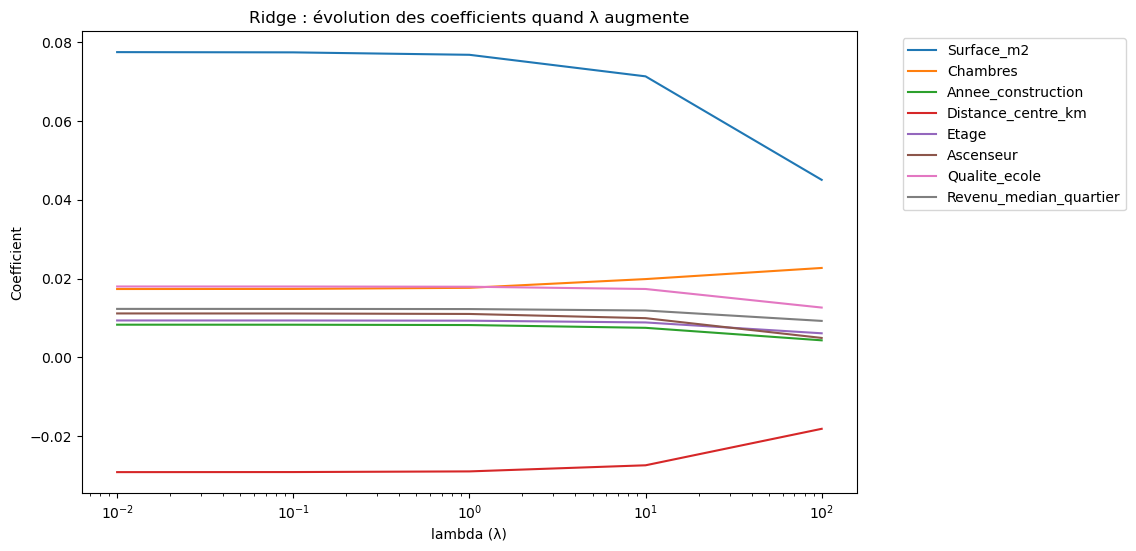

In [245]:
coefs = np.array(coefs)

plt.figure(figsize=(10,6))

for j, var in enumerate(X.columns):
    plt.plot(lambdas, coefs[:, j], label=var)

plt.xscale("log")
plt.xlabel("lambda (λ)")
plt.ylabel("Coefficient")
plt.title("Ridge : évolution des coefficients quand λ augmente")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Nous estimons un modèle **Ridge** pour **différentes valeurs** du paramètre de régularisation λ (0.01, 0.1, 1, 10, 100).  

Lorsque **λ augmente**, la pénalité appliquée aux coefficients devient **plus forte**.  

On observe que **l’ensemble des coefficients diminue progressivement** en valeur absolue lorsque λ augmente, sans jamais devenir exactement nul.  

Les variables les plus influentes (comme la surface) voient leur coefficient se **réduire** fortement, tandis que les variables moins informatives sont rapidement rapprochées de **zéro**.  

Le modèle Ridge permet ainsi de **stabiliser les estimations et de limiter l’impact de la multicolinéarité**, tout en conservant toutes les variables dans le modèle.

**2. Estimez un modèle Lasso pour différentes valeurs de λ. Analysez et commentez la manière dont les coefficients se modifient en fonction de λ.**

In [248]:
from sklearn.linear_model import Lasso

lambdas = [0.01, 0.1, 1, 10, 100]

coefs_lasso = []

for l in lambdas :
    lasso = Lasso(alpha=l, max_iter=10000)
    lasso.fit(X_std, y)
    coefs_lasso.append(lasso.coef_)

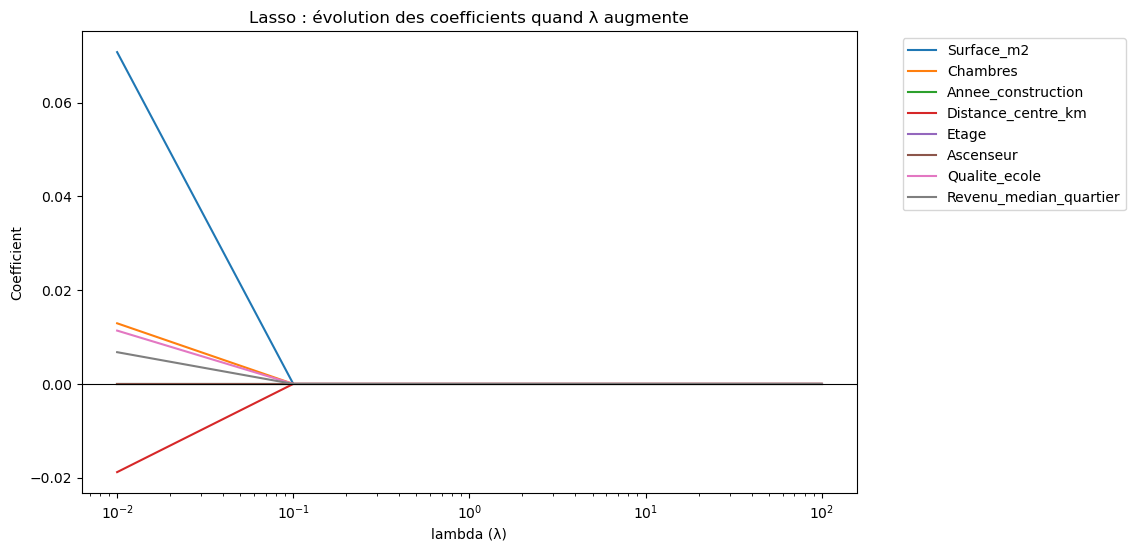

In [249]:
coefs_lasso = np.array(coefs_lasso)

plt.figure(figsize=(10,6))

for j, var in enumerate(X.columns):
    plt.plot(lambdas, coefs_lasso[:, j], label=var)

plt.xscale("log")
plt.xlabel("lambda (λ)")
plt.ylabel("Coefficient")
plt.title("Lasso : évolution des coefficients quand λ augmente")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.axhline(0, color="black", linewidth=0.8)
plt.show()


Quand le paramètre **λ augmente**, le modèle Lasso **pénalise de plus en plus les coefficients**.  

Dans notre cas, cette pénalisation est **rapidement très forte** : dès que λ devient modéré, **tous les coefficients sont ramenés à zéro**.  

Cela signifie que le **Lasso ne conserve aucune variable explicative** et privilégie un modèle très parcimonieux.  

Économétriquement, cela indique que, compte tenu des données, **aucune variable n’a un effet suffisamment robuste** pour être conservée sous une pénalisation élevée.

**3. Choissisez la valeur du paramètre λ. Pour cela, utilisez la validation croisée 10-fold pour choisir λ optimal.**

In [250]:
#Ridge

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

y = np.log(df["Prix_milliers_euros"])
X = df[['Surface_m2','Chambres','Annee_construction',
        'Distance_centre_km','Etage','Ascenseur','Qualite_ecole', 'Revenu_median_quartier']]

lambdas = np.logspace(-3, 3, 50)

cv =KFold(n_splits=10, shuffle=True, random_state=42)

ridge_CV = Pipeline([
    ("Scaler", StandardScaler()),
    ("model", RidgeCV(alphas=lambdas, cv=cv))
])

ridge_CV.fit(X,y)

best_lambda_ridge = ridge_CV.named_steps["model"].alpha_
print("Meilleur lambda (Ridge) =", best_lambda_ridge)

Meilleur lambda (Ridge) = 6.25055192527397


Le paramètre de régularisation λ est choisi à l’aide d’une validation croisée 10-fold.  

Pour un ensemble de **50 valeurs candidates de λ**, le modèle Ridge est estimé sur 9 folds et évalué sur le fold restant, et l’erreur de prédiction moyenne hors échantillon est calculée.  

Le λ qui minimise cette erreur est retenu comme λ optimal.  

Dans notre cas, la validation croisée 10-fold conduit à un **λ optimal égal à λ ≈ 6.25**.

En d'autres termes, la validation croisée indique qu’une **pénalisation modérée** des coefficients améliore la performance prédictive du modèle.  

Le λ optimal égal à 6.25 permet de **réduire la variance des estimateurs** sans introduire un biais excessif.

In [251]:
#Lasso

from sklearn.linear_model import LassoCV

y = np.log(df["Prix_milliers_euros"])
X = df[['Surface_m2','Chambres','Annee_construction',
        'Distance_centre_km','Etage','Ascenseur','Qualite_ecole','Revenu_median_quartier']]

lambdas = np.logspace(-3, 3, 50)

cv =KFold(n_splits=10, shuffle=True, random_state=42)

lasso_cv = Pipeline([
    ("Scaler", StandardScaler()),
    ("model", LassoCV(alphas=lambdas, cv=cv, max_iter=100000))
])

lasso_cv.fit(X, y)

best_lambda_lasso = lasso_cv.named_steps["model"].alpha_
print("Meilleur lambda (Lasso) =", best_lambda_lasso)

Meilleur lambda (Lasso) = 0.001


Le paramètre de régularisation λ est choisi à l’aide d’une validation croisée 10-fold.  

Pour un ensemble de **50 valeurs candidates de λ**, le modèle Lasso est estimé sur 9 folds et évalué sur le fold restant, et l’erreur de prédiction moyenne hors échantillon est calculée.  

Le λ qui minimise cette erreur est retenu comme λ optimal.  

Dans notre cas, la validation croisée 10-fold conduit à un **λ optimal égal à λ = 0.001**.  

En d’autres termes, la validation croisée indique qu’une **pénalisation très faible est optimale pour le modèle Lasso**.  

Cela suggère que les variables explicatives contiennent toutes une **information pertinente** pour expliquer le prix immobilier et que la sélection automatique de variables induite par le **Lasso n’est pas nécessaire dans ce contexte**.  

Un λ plus élevé conduirait à mettre certains coefficients à zéro, ce qui dégraderait la performance prédictive du modèle.

**Réponse à la question :**

- Pour **Ridge**, le λ optimal est **λ ≈ 6.25**, indiquant une pénalisation modérée des coefficients.  
- Pour **Lasso**, le λ optimal est **λ = 0.001**, ce qui correspond à une pénalisation très faible.  

Cela suggère que la **sélection de variables n’est pas nécessaire ici** et que les données favorisent un modèle proche du MCO.

**4. Comparez les résultats de trois modèles sur votre jeu de données. Divisez en train et test (80%- 20%) et comparez les erreurs de prédiction (RMSE) sur l’échantillon de test.**

In [252]:
from sklearn.model_selection import train_test_split

y = np.log(df["Prix_milliers_euros"])

X = df[['Surface_m2','Chambres','Annee_construction',
        'Distance_centre_km','Etage','Ascenseur','Qualite_ecole','Revenu_median_quartier']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Taille train :", X_train.shape[0])
print("Taille test :", X_test.shape[0])

Taille train : 120
Taille test : 30


In [253]:
import statsmodels.api as sm

X_train_OLS = sm.add_constant(X_train)

OLS_model = sm.OLS(y_train, X_train_OLS).fit()

In [254]:
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=best_lambda_ridge))
])

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Ridge(alpha=6.25055192527397))])

In [255]:
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=best_lambda_lasso, max_iter=100000))
])

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.001, max_iter=100000))])

In [256]:
from sklearn.metrics import mean_squared_error

#MCO
X_test_OLS = sm.add_constant(X_test)
y_pred_OLS = OLS_model.predict(X_test_OLS)

rmse_OLS = np.sqrt(mean_squared_error(y_test, y_pred_OLS))

#Ridge
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#Lasso
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("RMSE sur l’échantillon de test :")
print(f"MCO   : {rmse_OLS:.4f}")
print(f"Ridge : {rmse_ridge:.4f}")
print(f"Lasso : {rmse_lasso:.4f}")

RMSE sur l’échantillon de test :
MCO   : 0.0453
Ridge : 0.0440
Lasso : 0.0454


La comparaison des performances prédictives sur l’échantillon de test montre que le **modèle Ridge obtient la plus faible RMSE**, indiquant une **meilleure capacité de généralisation**.  

Le modèle **MCO** présente une **erreur légèrement plus élevée**, tandis que le **Lasso**, bien que parcimonieux, **n’améliore pas la performance prédictive** dans ce cas.  

Ces résultats suggèrent que la régularisation **Ridge** permet de **réduire la variance des estimations** sans introduire un **biais excessif**.

**Discussion : Pourquoi les écarts-types et tests classiques ne sont-ils pas valides après Lasso ?**

Après **Lasso**, les écarts-types et tests de significativité classiques ne sont pas valides car le Lasso **modifie volontairement les coefficients** et effectue une **sélection automatique des variables à partir des données**.  

Cette sélection rend les **coefficients biaisés par construction** et **viole les hypothèses statistiques** sur lesquelles reposent les tests classiques du MCO.  

Ainsi, le Lasso doit être vu comme un **outil de prédiction et de sélection de variables**, et non comme un modèle destiné à l’inférence statistique classique.

Dans l’ensemble, les résultats suggèrent que le modèle **MCO enrichi est adapté pour l’inférence économique**, tandis qu’une régularisation **Ridge permet un léger gain en performance prédictive hors échantillon**. Le Lasso, bien qu’utile pour la **sélection de variables**, ne présente pas d’avantage dans ce contexte.

# 8 Prévisions

**8.1 Prédiction ponctuelle et intervalle de confiance**

Dans cette section, nous utilisons le **modèle semi-logarithmique** sélectionné précédemment comme **meilleur modèle économétrique** (best_model).  

La variable **dépendante** est le **logarithme du prix du logement** (en milliers d’euros), ce qui permet de réduire l’hétéroscédasticité et de faciliter l’interprétation des coefficients en termes de variations relatives.  

Le modèle est estimé par MCO en incluant **l’ensemble des variables explicatives** nécessaires à la prédiction demandée.

-----------------------
Cette cellule re-définit le modèle semi-logarithmique par la méthode des **moindres carrés ordinaires (MCO)**.  

Une **constante est ajoutée** au modèle afin de capturer l’effet moyen du prix lorsque l’ensemble des variables explicatives est nul.

La variable Distance_universite n’est pas incluse dans le modèle de prédiction final, car elle est introduite uniquement comme instrument dans l’estimation par variables instrumentales et ne satisfait pas l’hypothèse d’exogénéité requise pour être intégrée directement parmi les variables explicatives du modèle MCO.

In [257]:
# Variable dépendante
y_log = np.log(df["Prix_milliers_euros"])

# Variables explicatives (modèle enrichi validé)
X_semi_log = df[
    [
        "Surface_m2",
        "Chambres",
        "Annee_construction",
        "Distance_centre_km",
        "Etage",
        "Ascenseur",
        "Annee_vente",
        "Qualite_ecole",
        "Revenu_median_quartier",
    ]
]

X_semi_log = sm.add_constant(X_semi_log)

# Estimation du modèle
best_model = sm.OLS(y_log, X_semi_log).fit()

print(best_model.summary())


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.900
Model:                             OLS   Adj. R-squared:                  0.894
Method:                  Least Squares   F-statistic:                     140.0
Date:                 Wed, 31 Dec 2025   Prob (F-statistic):           1.88e-65
Time:                         00:27:01   Log-Likelihood:                 292.17
No. Observations:                  150   AIC:                            -564.3
Df Residuals:                      140   BIC:                            -534.2
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

Nous définissons ici les **caractéristiques du logement** pour lequel une prédiction de prix est demandée.  

Les valeurs sont renseignées conformément à l’énoncé, en respectant les unités utilisées lors de l’estimation (notamment le revenu médian du quartier exprimé en milliers d’euros).  

Une **constante est ajoutée** afin d’assurer la cohérence dimensionnelle avec le modèle estimé.

In [258]:
new_house = pd.DataFrame({
    "Surface_m2": [120],
    "Chambres": [3],
    "Annee_construction": [2015],
    "Distance_centre_km": [5],
    "Etage": [1],
    "Ascenseur": [1],      
    "Annee_vente": [2023],
    "Qualite_ecole": [7],
    "Revenu_median_quartier": [65]
})

new_house = sm.add_constant(new_house, has_constant="add")


À partir du **modèle semi-logarithmique estimé**, nous calculons la **prédiction du logarithme du prix du logement** ainsi que l’**intervalle de confiance à 95 %** de l’espérance conditionnelle.  

Les résultats sont ensuite **retranscrits sur l’échelle du prix** en appliquant une transformation exponentielle.  

L’intervalle obtenu correspond à l’intervalle de confiance du prix moyen prédit, conditionnellement aux caractéristiques du logement.

In [259]:
# Prédiction
prediction = best_model.get_prediction(new_house)
pred_summary = prediction.summary_frame(alpha=0.05)

# Valeurs en log
mean_log = pred_summary.loc[0, "mean"]
lower_log = pred_summary.loc[0, "mean_ci_lower"]
upper_log = pred_summary.loc[0, "mean_ci_upper"]

# Back-transformation (prix en milliers d'euros)
mean_price = np.exp(mean_log)
lower_price = np.exp(lower_log)
upper_price = np.exp(upper_log)

print(f"Prix prédit : {mean_price:.2f} milliers d'euros")
print(f"Intervalle de confiance à 95 % : [{lower_price:.2f} ; {upper_price:.2f}] milliers d'euros")


Prix prédit : 2354.64 milliers d'euros
Intervalle de confiance à 95 % : [2312.76 ; 2397.28] milliers d'euros


**3. Cette prédiction est-elle fiable ? Discutez.**

La prédiction obtenue à partir du modèle semi-logarithmique estimé par MCO indique un **prix prédit d’environ 2 354.64 milliers d’euros**, avec un intervalle de confiance à 95 % relativement étroit **[2312.76;2397.28]**.  

La **faible largeur de cet intervalle** suggère une **bonne précision** statistique de l’estimation de l’espérance conditionnelle du prix, compte tenu des caractéristiques du logement.  

Plusieurs éléments plaident en faveur de la fiabilité de cette prédiction.
- Tout d’abord, le modèle présente une **très bonne qualité d’ajustement globale (R² ≈ 0,90)**, indiquant que la majorité de la variabilité du prix est expliquée par les variables incluses.  
- Ensuite, la plupart des **coefficients sont statistiquement significatifs** et présentent des signes économiquement cohérents (effet positif de la surface, des chambres, de la qualité des écoles, et effet négatif de la distance au centre).
- Enfin, la prédiction est **réalisée dans le champ des données observées** (valeurs plausibles des variables), ce qui limite les risques liés à l’extrapolation.  

Cependant, cette prédiction doit être interprétée avec **prudence**.  
- D’une part, l’intervalle de confiance calculé correspond à **l’incertitude sur la moyenne conditionnelle**, et non à un intervalle de prédiction individuel : la variabilité réelle des prix autour de cette moyenne peut être plus importante.  
- D’autre part, le résumé du modèle signale un **nombre de condition élevé**, suggérant une possible **multicolinéarité** entre certaines variables, ce qui peut affecter la stabilité de certains coefficients.  
- Enfin, la validité de la prédiction repose sur les **hypothèses classiques du modèle MCO** (spécification correcte, absence de biais d’omission, exogénéité), qui ne peuvent jamais être garanties parfaitement en pratique.

# Conclusion

En conclusion, la prédiction obtenue à partir du modèle semi-logarithmique **apparaît statistiquement crédible** et **économiquement cohérente**, avec un intervalle de confiance étroit reflétant une bonne précision de l’estimation.  

Néanmoins, elle doit être **interprétée comme une valeur moyenne attendue**, conditionnelle aux caractéristiques observées du logement, et non comme une valeur certaine. 